# Assignment 2
### General Instructions
  + The Python standard library is not enough to do solve these questions. You will need to import appropriate libraries for each task. Generally, you might import and use any library you wish unless otherwise stated. 
  + Where detail instructions like variable or function names, required libraries, and etc are not given by the question, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + When you are required to explain or answer in text format open a Markdown cell and enter your answer in it.
  + Do not remove or modify the original cells provided by the instructor.
  + Comment your code whenever needed using # sign at the beginning of the row.
  + Do not hesitate to communicate your questions to the TAs or instructors. Good luck! 

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## Question 1 <span style="color:red">(40 points)</span>

1.  Download `Income2.csv` from http://www-bcf.usc.edu/~gareth/ISL/Income2.csv
2.  Load the data into this Jupyter notebook. 
3.  Describe the data using descriptive statistics such as measures of central tendancy, dispersion or association.
4.  Explore the data by vizualing it through various figures. Clearly explain or interpret each figure, justify the appropriateness of the tool used for visualization, highlight the information it provides, and, finally, explain how this information affect your further analysis.
5.	Model `Income` as a linear function of `Years of Education`. What are your independent and dependent variables? What type of model did you use? Why?
6.  Scatterplot the dependent and independent variables used in the model versus each other. Based on the scatterplot, do you think a linear model is an adequate model for the data in hand? Discuss your answer. 
7.  Print the slope of the fitted line out and provide a $95\%$ confidence interval for the estimate slope.
8.  Add the fitted line over the scatterplot.
9.  Using the **discrete uniform** distribution, randomly generate $10$ numbers between the $25$ and $75$ percentiles of the variable `Years of Education` in the original data. If these numbers represent years of education for $10$ employees, then predict each person's `Income` due to your model.
10. Now, model  `Income` as a linear function of both `Years of Education` and `Seniority`. What type of model did you use? How many parameters (coefficients) does this model have? 
11. Print out the estimated coefficients after the model has been fitted.
12. How much would be the `Income` of a new individual with $18$ years of education and $60$ years of seniority?
13.	Argue which of `Years of Education` or `Seniority` is a stronger predictor of `Income`? Justify your comparison. (**Hint**: take into consideration that these variables are in different units)


In [2]:
import sklearn
import statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats  as stats
import statsmodels.formula.api as smf
import math

In [3]:
#1.Download Income2.csv from http://www-bcf.usc.edu/~gareth/ISL/Income2.csv
#2.Load the data into this Jupyter notebook
path='data/'
filename = path+'Income2.csv'
income_data = pd.read_csv(filename)
income_data.head()

,Unnamed: 0,Education,Seniority,Income
0,1,21.586207,113.103448,99.917173
1,2,18.275862,119.310345,92.579135
2,3,12.068966,100.689655,34.678727
3,4,17.034483,187.586207,78.702806
4,5,19.931034,20.000000,68.009922


In [4]:
#3.Describe the data using descriptive statistics such as measures of central tendancy, dispersion or association.
income_data.describe()

,Unnamed: 0,Education,Seniority,Income
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,16.386207,93.862069,62.744733
std,8.803408,3.810622,55.715623,27.013285
min,1.000000,10.000000,20.000000,17.613593
25%,8.250000,12.482759,44.827586,36.392043
50%,15.500000,17.034483,94.482759,70.804791
75%,22.750000,19.931034,133.275862,85.930608
max,30.000000,21.586207,187.586207,99.917173


#3. Describe the data using descriptive statistics such as measures of central tendancy, dispersion or association

Ans:There are total 30 observations with 3 major variables to be consider. They are Education,Seniority and Income and all the 3 variable are continuous.
Education:It is describing the years of education and the range is in between 10 to 21.586207.The mean value is 16.38 and median in 17.034.
Seniority:It is describing the serniority in the unit of months and its range is in between 20 to 187.58. The mean and median value are 93.86 and 94.48 respectively.
Income:It is describing the income in thousand units. The range of this variable is 17.613 to 99.917 and the mean and median value are 62.744 and 70.804 respectively

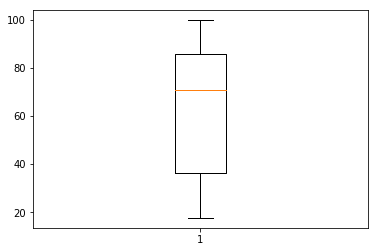

In [5]:
plt.boxplot(income_data.Income);


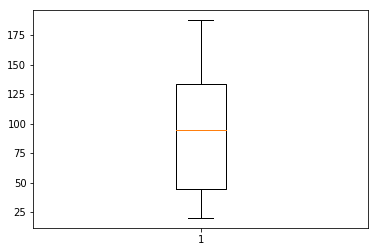

In [6]:
plt.boxplot(income_data.Seniority);

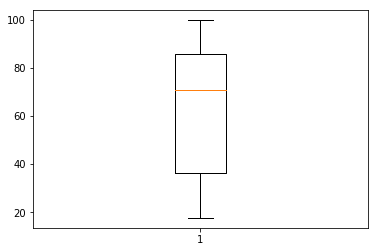

In [7]:
plt.boxplot(income_data.Income);

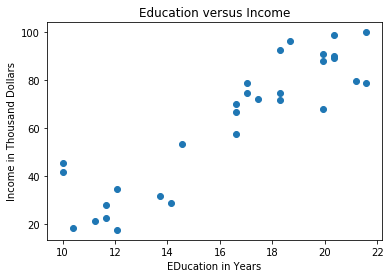

In [8]:
plt.scatter(income_data.Education, income_data.Income)
plt.title('Education versus Income')
plt.xlabel('EDucation in Years')
plt.ylabel('Income in Thousand Dollars');

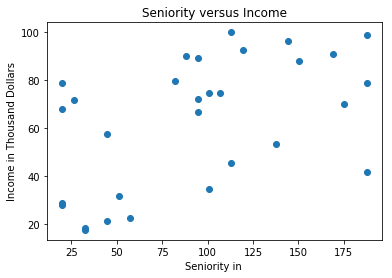

In [9]:
plt.scatter(income_data.Seniority, income_data.Income)
plt.title('Seniority versus Income')
plt.xlabel('Seniority in ')
plt.ylabel('Income in Thousand Dollars');

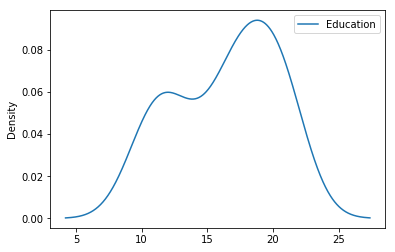

In [10]:
pd.DataFrame(income_data['Education']).plot(kind="density", figsize=(6,4)); 

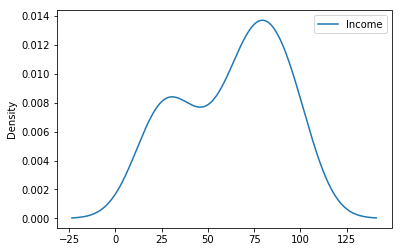

In [11]:
pd.DataFrame(income_data['Income']).plot(kind="density", figsize=(6,4)); 

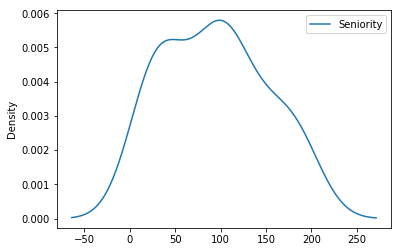

In [12]:
pd.DataFrame(income_data['Seniority']).plot(kind="density", figsize=(6,4)); 

4.Explore the data by vizualing it through various figures. Clearly explain or interpret each figure, justify the appropriateness of the tool used for visualization, highlight the information it provides, and,finally, explain how this information affect your further analysis.

Ans:Here income is treated as the dependent variable while Education and seniority are considered to be independent variables.

Scatter plot is drawn to visualize the linear relationship between dependent and Independent variables. When Years of Education increases the Income also increases. Similarly when seniority increases the income also increases however here variable are more dispersed.

Box plot is drawn to spot any outlier observations in the variable. Density plot is drawn to see the distribution of the independent variable. From the above density plot it is observed that all the 3 data have normally distributed (a bell shaped curve), without being skewed to the left or right.

In [13]:
#5.Model Income as a linear function of Years of Education. What are your independent and dependent variables? 
#What type of model did you use? Why?

from sklearn.linear_model import LinearRegression

# initialize the model first
lr = LinearRegression()
# fit the model and feed the data
lr.fit(X = income_data[ ['Education'] ], y = income_data['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
print(lr.intercept_, lr.coef_)

-41.91661220978736 [6.38716122]


5.Ans:Years of Education is the independent and Income is the dependent variables

Ans:Here Income is treated as the dependent variable while Education and Seniority are considered to be independent variables.

From the Scatter plot we can see when Years of Education increases the Income also increases. Similarly when seniority increases the income also increases however here variable are more dispersed. Therfore we can use Linear regression model for this .

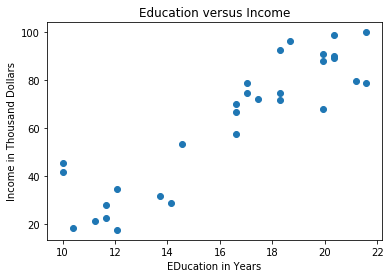

In [15]:
#6.Scatterplot the dependent and independent variables used in the model versus each other. 
plt.scatter(income_data.Education, income_data.Income)
plt.title('Education versus Income')
plt.xlabel('EDucation in Years')
plt.ylabel('Income in Thousand Dollars');

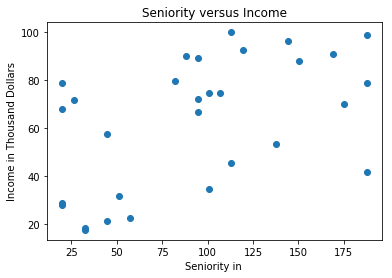

In [16]:
plt.scatter(income_data.Seniority, income_data.Income)
plt.title('Seniority versus Income')
plt.xlabel('Seniority in ')
plt.ylabel('Income in Thousand Dollars');

6.Based on the scatterplot, do you think a linear model is an adequate model for the data in hand? Discuss your answer.

Ans:From the Scatter plot we can see when Years of Education increases the Income also increases. Similarly when seniority increases the income also increases however here variable are more dispersed. Therefore we can use Linear regression model for this .

In [17]:
#7.Print the slope of the fitted line out provide a  95%  confidence interval for the estimate slope.
model = smf.ols('Income ~ Education', data=income_data)
lr_model = model.fit()

#Print out the statistics
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     120.8
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           1.15e-11
Time:                        13:47:10   Log-Likelihood:                -115.90
No. Observations:                  30   AIC:                             235.8
Df Residuals:                      28   BIC:                             238.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.9166      9.769     -4.291      0.000     -61.927     -21.906
Education      6.3872      0.581     10.990      0.000       5.197       7.578
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.652
Skew:                           0.140   Prob(JB):                        0.722
Kurtosis:                       2.335   Cond. No.                         75.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Education')

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Education vs Income')

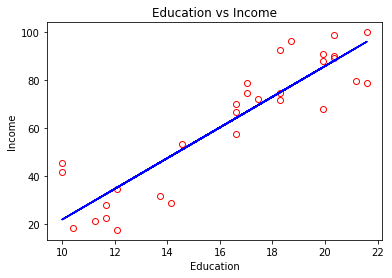

In [18]:
#8.Add the fitted line over the scatterplot

plt.plot(income_data.Education, income_data.Income, 'or', mfc='none')
# add a regression line
plt.plot(income_data.Education, lr_model.params.Intercept+lr_model.params.Education*income_data.Education, "-b");
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Education vs Income')

In [19]:
#9.Using the discrete uniform distribution, randomly generate  10  numbers between the  25  and  75  percentiles of the variable
# Years of Education in the original data. If these numbers represent years of education for  10  employees, 
# then predict each person's Income due to your model. 

#25  and  75  percentiles of the variable
q1 = np.percentile(income_data.Education, 25) # 25%
q2 = np.percentile(income_data.Education, 75) # 75%

#Using the discrete uniform distribution, randomly generate  10  numbers between the  25  and  75  percentiles of the variable
#'Years of Education' in the original data.
uniform_data = stats.uniform.rvs(size=10,  # Generate 100000 numbers
                                 loc = q1 ,      # From 25% 
                                 scale= q2 - q1)     # To 75%
print(uniform_data)

#If these numbers represent years of education for  10  employees,then predict each person's Income due to your model.
# initialize the model first
lr = LinearRegression()
# fit the model and feed the data
lr.fit(X = income_data[ ['Education'] ], y = income_data['Income'])
print('The predicted Income are:',lr.predict(uniform_data.reshape(10,1)).reshape(10,1))


[19.61549131 16.58842926 19.25373651 18.94354861 13.02007419 17.39542008
 16.65419413 19.71966697 16.49748496 14.72006958]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The predicted Income are: [[83.37069311]
 [64.0363598 ]
 [81.06010694]
 [79.07888681]
 [41.24470068]
 [69.19074026]
 [64.45641066]
 [84.03607989]
 [63.45548389]
 [52.10284535]]


10.Now, model  Income as a linear function of both Years of Education and Seniority. 
What type of model did you use? How many parameters (coefficients) does this model have?

In [20]:
model_mult = smf.ols('Income ~ Education + Seniority', data=income_data)
lr_model_mult = model_mult.fit()

#Print out the statistics
lr_model_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           1.13e-16
Time:                        13:47:12   Log-Likelihood:                -100.15
No. Observations:                  30   AIC:                             206.3
Df Residuals:                      27   BIC:                             210.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.0856      5.999     -8.349      0.000     -62.394     -37.777
Education      5.8956      0.357     16.513      0.000       5.163       6.628
Seniority      0.1729      0.024      7.079      0.000       0.123       0.223
==============================================================================
Omnibus:                        3.352   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.672
Skew:                           0.729   Prob(JB):                        0.263
Kurtosis:                       2.892   Cond. No.                         502.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ans: From the model we can see it is a Linear Regression model as the method used is least squares. There are 2 parameters (coefficients) are here one for Education and one is for Seniority. For coeffiecients for 'Education' and 'Seniority' is:5.8956 and 0.1729 respectively.

In [21]:
#11.Print out the estimated coefficients after the model has been fitted
lr_mult = LinearRegression()
lr_mult.fit(X = income_data[ ['Education', 'Seniority'] ], y = income_data['Income'])
print('The coefficients are', lr_mult.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The coefficients are [5.89555596 0.17285547]


In [22]:
#12.How much would be the Income of a new individual with  18  years of education and  60  years of seniority?
X_new = np.array([18, 60])
print(X_new.reshape(1,2))

print("The income will be:", lr_mult.predict(X_new.reshape(1,2)).reshape(1,1))

[[18 60]]
The income will be: [[66.4056967]]


In [23]:
#13.Argue which of Years of Education or Seniority is a stronger predictor of Income? Justify your comparison. 
#(Hint: take into consideration that these variables are in different units)
model_Edu = smf.ols('Income ~ Education', data=income_data)
lr_model_Edu = model_Edu.fit()
lr_model_Edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     120.8
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           1.15e-11
Time:                        13:47:16   Log-Likelihood:                -115.90
No. Observations:                  30   AIC:                             235.8
Df Residuals:                      28   BIC:                             238.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.9166      9.769     -4.291      0.000     -61.927     -21.906
Education      6.3872      0.581     10.990      0.000       5.197       7.578
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.652
Skew:                           0.140   Prob(JB):                        0.722
Kurtosis:                       2.335   Cond. No.                         75.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model_Sen = smf.ols('Income ~ Seniority', data=income_data)
lr_model_Sen = model_Sen.fit()
lr_model_Sen.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     10.28
Date:                Wed, 17 Apr 2019   Prob (F-statistic):            0.00335
Time:                        13:47:16   Log-Likelihood:                -136.26
No. Observations:                  30   AIC:                             276.5
Df Residuals:                      28   BIC:                             279.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1583      8.516      4.598      0.000      21.714      56.602
Seniority      0.2513      0.078      3.207      0.003       0.091       0.412
==============================================================================
Omnibus:                        7.403   Durbin-Watson:                   2.410
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                2.253
Skew:                          -0.208   Prob(JB):                        0.324
Kurtosis:                       1.724   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ans:Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit.
Comparing the R-Squared value for both the predictor Education and Seniority (which is 0.805 and 0.243 respectively) we can  see that Education~Income model has a better fitting. Therefore it can act as a stronger predictor for income. Also from the Prob (F-statistic)(p value) value shows that Education is a stronger predictor than Seniority.(Prob (F-statistic) for Education and Seniority are: :1.15e-11 & 0.00335 respectively)

## Question 2 <span style="color:red">(30 points)</span>

1.  Download `Credit.csv` from http://www-bcf.usc.edu/~gareth/ISL/Credit.csv
2.  Load the data into this Jupyter notebook. 
3.  Describe the data using descriptive statistics such as measures of central tendancy, dispersion or association.
4.  Explore the data by vizualing it through various figures. Clearly explain or interpret each figure, justify the appropriateness of the tool used for visualization, highlight the information it provides, and, finally, explain how this information affect your further analysis.
5.  Which variables of this dataset are **qualitative** and which ones are **quantitative**? Create an attribute (also called design) matrix  $\mathbf{X}$ that includes only the following attributes:`Income`, `Limit`, `Rating`, `Cards`, `Age`, and `Education`.
6.  Create a binary variable `Balance_1500` which equals $1$ for each observation if `Balance` $> 1500$ for that observation and equals $0$ otherwise.
7.  Model `Balance_1500` by the explanatory variables mentionned in Step 5 using the following models: 
    + logistic regression, 
    + linear discriminant, and 
    + quadratic discriminant.
8. Interpret the coefficients of `Income`, `Age`, and `Education` for the logistic regression model.    
9. Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

    Compare the probabilities and comment.
    
10. For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment. 
11. Plot the ROC Curve of the three methods on the same figure. Comment.

In [25]:
#1.Download Credit.csv from http://www-bcf.usc.edu/~gareth/ISL/Credit.csv
#2.Load the data into this Jupyter notebook.
path='data/'
filename = path+'Credit.csv'
Credit_data = pd.read_csv(filename)
Credit_data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [26]:
#3.Describe the data using descriptive statistics such as measures of central tendancy, dispersion or association.
Credit_data.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


3.Describe the data using descriptive statistics such as measures of central tendancy, dispersion or association.

Ans:There are total 400 observations with data for Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethinicity,Balance.Out of which ncome, Limit, Rating, Cards, Age, Education and Balance are continues, while Gender, Student, Married and Ethnicity are categorical.

Income:It is describing the Income in thousand og units and the range is in between 10.35 to 186.63.The mean value is 45.21 and median is 33.11. Limit:It is describing the Credit limit and its range is in between 855 to 13913. The mean and median value are 4735.60 and 4622.50 respectively. Rating:It is describing the rating of the credit card. The range of this variable is 93 to 982 and the mean and median value are 354.94 and 344 respectively. Cards:It is describing the no of cards the card holder is having. The range of this variable is 1 to 9 and the mean and median value are 2.95 & 3 respectively. Age:It is describing the Age of the card holder in unit years.The range is in between 23 to 98 and the mean and median are 55.66 & 56 Respectively. Education:It is describing the years education the card holder is having. The range for this data is in between 5 to 20 yrs and the mean and median values are 13.45 and 14 respectively. Balance:It describes the Balance in the Credit card. The range for this data is in between 0 to 1999 and the mean and median values are 520 and 459.5 respectively.

Gender: describes the gender of the card holder having 2 classes 'Male','Female'. Student:Describes whether the card holder is astudent or not and has 2 classes 'Yes' and 'No' Married:Describes whether the card holder is Married or not and 2 classes 'Yes' and 'No' Ethinicity:Describes the Ethnicity of the card holder and is having 3 classes 'Caucasian','Asian','African American'


4.Explore the data by vizualing it through various figures. Clearly explain or interpret each figure, justify the appropriateness of the tool used for visualization, highlight the information it provides, and, finally, explain how this information affect your further analysis.

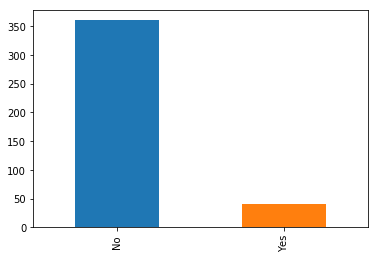

In [27]:
Credit_data['Student'].value_counts().plot(kind='bar');

A bar chart is generally used to present relative quantities for multiple categories.In the above figure we can interprete how many card holders are student or not. Simlarly we cal plot for other categorical data to show different classes of those cariables.

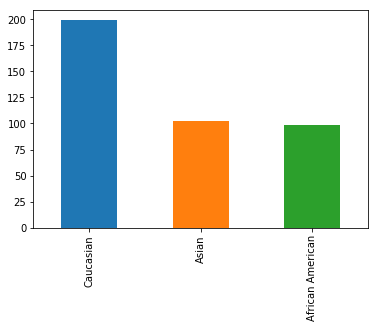

In [28]:

Credit_data['Ethnicity'].value_counts().plot(kind='bar')

A histogram plot is generally used to summarize the distribution of a data sample. A boxplot is generally used to summarize the distribution of a data sample

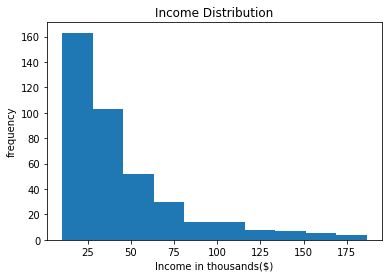

In [29]:
plt.hist(Credit_data['Income'])
plt.title('Income Distribution')
plt.xlabel('Income in thousands($)')
plt.ylabel('frequency');

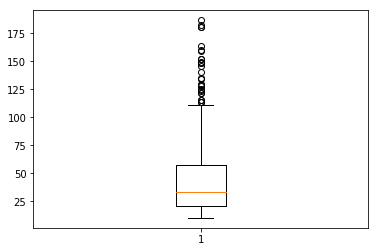

In [30]:
plt.boxplot(Credit_data.Income);

For Income data many of the datas are outlier 

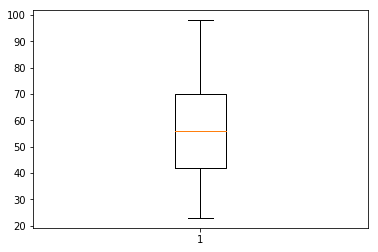

In [31]:
plt.boxplot(Credit_data.Age);

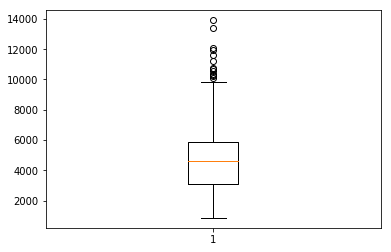

In [32]:
plt.boxplot(Credit_data.Limit);

Scatterplot matrix shows the relationship between two variables as dots in two dimensions

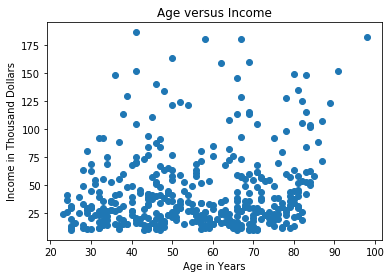

In [33]:
plt.scatter(Credit_data.Age, Credit_data.Income)
plt.title('Age versus Income')
plt.xlabel('Age in Years')
plt.ylabel('Income in Thousand Dollars');

5.Which variables of this dataset are qualitative and which ones are quantitative? 

Ans:In this dataset 'Income','Limit','Rating','Cards','Age','Education' & 'Balance' are quantitative data.The other data as 'Gender','Student','Married','Ethinicity' are qualitative data.


In [34]:
#5.Create an attribute (also called design) matrix  𝐗  that includes only the 
# following attributes:Income, Limit, Rating, Cards, Age, and Education
X = Credit_data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']]
X.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [35]:
#6.Create a binary variable Balance_1500 which equals  1  for each observation if Balance  >1500  for that observation 
# and equals  0  otherwise
X['Balance_1500'] = np.where(X['Balance']>1500, 1, 0)
X.head()

C:\Users\mana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Income,Limit,Rating,Cards,Age,Education,Balance,Balance_1500
0,14.891,3606,283,2,34,11,333,0
1,106.025,6645,483,3,82,15,903,0
2,104.593,7075,514,4,71,11,580,0
3,148.924,9504,681,3,36,11,964,0
4,55.882,4897,357,2,68,16,331,0


In [36]:
#7.Model Balance_1500 by the explanatory variables mentionned in Step 5 using the following models
X5 = X[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = X['Balance_1500']

#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X5, y)

C:\Users\mana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
#LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X5,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X5,y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [39]:
#8.Interpret the coefficients of Income, Age, and Education for the logistic regression model.
import statsmodels.formula.api as smf
lr_smf = smf.Logit.from_formula(formula = "Balance_1500~Income+Limit+Rating+Cards+Age+Education", 
                            data= X).fit()

Optimization terminated successfully.
         Current function value: 0.040712
         Iterations 11


In [40]:
lr_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Balance_1500   No. Observations:                  400
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Apr 2019   Pseudo R-squ.:                  0.6217
Time:                        13:47:26   Log-Likelihood:                -16.285
converged:                       True   LL-Null:                       -43.046
                                        LLR p-value:                 9.206e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.8495      6.048     -2.786      0.005     -28.703      -4.996
Income        -0.0840      0.041     -2.043      0.041      -0.165      -0.003
Limit          0.0019      0.004      0.520      0.603      -0.005       0.009
Rating         0.0125      0.053      0.238      0.812      -0.091       0.116
Cards          0.1227      0.416      0.295      0.768      -0.693       0.938
Age           -0.0204      0.031     -0.654      0.513      -0.082       0.041
Education     -0.0747      0.142     -0.526      0.599      -0.353       0.204
==============================================================================

Possibly complete quasi-separation: A fraction 0.49 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

8.Interpretation

Ans:After analysing the coefficients of all the variable, it is observed that 'Income','Age','Education' has inverse relationship with Balance_1500. The other datas such as 'Limit', 'Rating' and 'Cards' has +ve coefficient which indicates these variables are positively corelated with   Balance_1500.

9.Find the probability of (Balance  >1500 ), for the following values, using all three aforementionned methods:
                Income	Limit	Rating	Cards	Age	Education
                    63	8100	600	4	30	13
                    186	13414	950	2	41	13
Compare the probabilities and comment.

In [59]:
X_pred = np.array([63,8100,600,4,30,13,186,13414,950,2,41,13]).reshape(2,6)
print(X_pred)

[[   63  8100   600     4    30    13]
 [  186 13414   950     2    41    13]]


In [42]:
lr.predict_proba(X_pred)
y_pred_lr = lr.predict(X_pred)

array([[0.90629018, 0.09370982],
       [0.17306781, 0.82693219]])

In [43]:
print(lda.predict_proba(X_pred))

[[0.94050988 0.05949012]
 [0.00721199 0.99278801]]


In [44]:
print(qda.predict_proba(X_pred))

[[9.99999995e-01 4.93626009e-09]
 [7.83057752e-04 9.99216942e-01]]


In [45]:
#10.For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment.
#For Logistic regression
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(X5)
print(confusion_matrix(y, y_pred_lr))

from sklearn.metrics import roc_auc_score
log_AUC_LR = roc_auc_score(y, y_pred_lr)
print('AUC_logistic:%.3f'% log_AUC_LR)

[[390   1]
 [  6   3]]
AUC_logistic:0.665


In [46]:
#For Linear discriminant 
y_pred_lda = lda.predict(X5)
print(confusion_matrix(y, y_pred_lda))
log_AUC_LDA = roc_auc_score(y, y_pred_lda)
print('AUC_LDA:%.3f'% log_AUC_LDA)

[[383   8]
 [  4   5]]
AUC_LDA:0.768


In [47]:
#For Quadratic discriminant
y_pred_qda = qda.predict(X5)
print(confusion_matrix(y, y_pred_qda))
log_AUC_QDA = roc_auc_score(y, y_pred_qda)
print('AUC_QDA:%.3f'% log_AUC_QDA)

[[390   1]
 [  2   7]]
AUC_QDA:0.888


Compring the confusion matrix and AUC value of Logistic regression and LDA and QDA, we can say that the accuracy of the QDA is better than the rest of the 2.

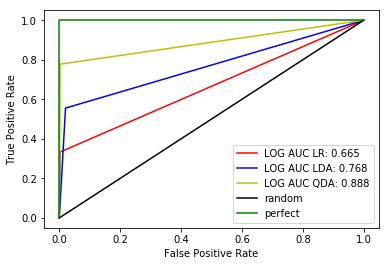

In [48]:
#11.Plot the ROC Curve of the three methods on the same figure. Comment.
#logistic Regression
from sklearn.metrics import roc_curve
log_fpr1, log_tpr1, log_thresholds1 = roc_curve(y, y_pred_lr)
log_fpr2, log_tpr2, log_thresholds2 = roc_curve(y, y_pred_lda)
log_fpr3, log_tpr3, log_thresholds3 = roc_curve(y, y_pred_qda)
plt.plot(log_fpr1, log_tpr1,'r-',label = 'LOG AUC LR: %.3f'%log_AUC_LR)
plt.plot(log_fpr2, log_tpr2,'b-',label = 'LOG AUC LDA: %.3f'%log_AUC_LDA)
plt.plot(log_fpr3, log_tpr3,'y-',label = 'LOG AUC QDA: %.3f'%log_AUC_QDA)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

## Question 3 <span style="color:red">(30 points)</span>

1. From the dataset `Credit.csv`, extract the variable `Student` and save it as `Student`. 
2. Save the number of observations in `Student` as `population_size`.
3. Factorize `Student` and compute the proportion of "students" and save it as `true_p`. 

Let us consider the following simple logistic regression model

$$ \mathrm{Pr}(\mathrm{Student = Yes}) = \frac{e^{\beta}}{1 + e^{\beta}}. $$

Here, we do not consider any predictor. The objective is to estimate $\beta$ by manipulating the likelihood of the model.

4. Define a variable `sample_size` $=100$. Now, sample `sample_size` number of observations from `Student` and call it `sample`.
5. Define a function called `likelihood` which takes one argument `beta` and computes the likelihood of `beta` based on the `sample`.  
6. Randomly generate $50$ numbers from the **continuous uniform** distribution $U[-5;5]$. Save these numbers as `beta_candidate`.
7. Using the `likelihood` function defined in Step 5, compute the likelihood of `beta_candidate` and save it as `likelihood_candidate`. Plot the `likelihood_candidate` versus `beta_candidate`.
8. Based on the plot, which value of `beta_candidate` would you choose as the estimate of $\beta$ ? Explain why.
9. Based on the chosen `beta_candidate`, estimate the `true_p` (or $\mathrm{Pr}(\mathrm{Student = Yes})$ ).

In [49]:
#1.Read dataset Credit.csv
path='data/'
filename = path+'Credit.csv'
Credit_data = pd.read_csv(filename)
Credit_data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [50]:
#1.From the dataset Credit.csv, extract the variable Student and save it as Student
Student = Credit_data[['Student']]
Student.head()

,Student
0,No
1,Yes
2,No
3,No
4,No


In [51]:
#2.Save the number of observations in Student as population_size.
population_size = Student.size
print(population_size)

400


In [52]:
#3.Factorize Student and compute the proportion of "students" and save it as true_p
Student['Default'] = Student.Student.factorize()[0]
print(Student['Default'].value_counts()/population_size)
Student['true_p'] = np.where(Student['Default']== 0, 0.9, 0.1)
Student.head()

0    0.9
1    0.1
Name: Default, dtype: float64


C:\Users\mana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mana\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Student,Default,true_p
0,No,0,0.9
1,Yes,1,0.1
2,No,0,0.9
3,No,0,0.9
4,No,0,0.9


In [53]:
#4.Define a variable sample_size  =100 . Now, sample sample_size number of observations from Student and call it sample.
np.random.seed(123)
sample_size  =100
sample = np.random.choice(a= Student['true_p'], size = sample_size)

In [54]:
#5.Define a function called likelihood which takes one argument beta and computes the likelihood of beta based on the sample.

def likelihood(beta):
    result = np.array([])
    for i in sample:
        value =  math.exp(beta)/(1+math.exp(beta))
        value1 = value ** i
        value2 = (1-value1) ** (1-i)
        result = np.append(result,value1 * value2)
    #print(result)  
    final_result = np.prod(result) 
    #print(final_result)
    return final_result
    

In [55]:
#6.Randomly generate  50  numbers from the continuous uniform distribution  𝑈[−5;5] . Save these numbers as beta_candidate.
import scipy.stats  as stats
beta_candidate = stats.uniform.rvs(size=50,  # Generate 50 numbers
                                 loc = -5,  # From -5 
                                 scale= 10) # To 5
print(beta_candidate)

[ 1.74689051  3.42342438 -4.16805012  2.63682841 -2.56333625 -3.05777039
  0.72456957 -4.04287483  3.85326826  1.27248972  2.23416358 -4.83870793
  0.94431879  0.56785192 -3.41040356 -3.46929485  1.95529529 -1.81233574
  1.91970296  0.5438325  -1.11049426  4.2513249   3.41669997 -1.42602433
 -4.56408536 -1.95231927 -1.01814318  2.0495883   4.95358482 -1.44085134
  2.62547814  0.93176917  1.91701799 -3.48872548 -1.01123707 -2.59144102
 -1.56543986  0.13128154  1.6662455  -3.94091515 -3.69105049 -1.78019394
  1.61564337  3.46506225  0.53257345  3.54452488 -1.15162189 -1.83212103
 -1.45735324 -3.28918171]


In [56]:
#7.Using the likelihood function defined in Step 5, compute the likelihood of beta_candidate and save it as likelihood_candidate
likelihood_candidate = np.array([])
for i in beta_candidate:
    likelihood_candidate = np.append(likelihood_candidate,likelihood(i)) 

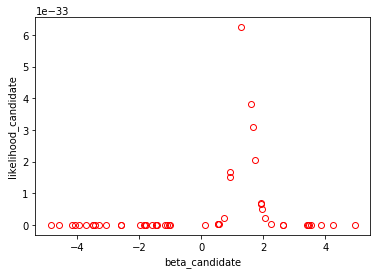

In [57]:
#8.Plot the likelihood_candidate versus beta_candidate.
import matplotlib.pyplot as plt
plt.plot(beta_candidate,likelihood_candidate, 'or', mfc='none')
plt.ylabel('likelihood_candidate')
plt.xlabel('beta_candidate');

8.Based on the plot, which value of beta_candidate would you choose as the estimate of  𝛽  ? Explain why.

Ans:beta_candidate = 

In [58]:
#9.Based on the chosen beta_candidate, estimate the true_p (or  Pr(Student=Yes)  ).